# This Notebook is used to show pictures of sludge projects
From 2021.Oct.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
CITY = pd.read_csv('CITY.csv', encoding='utf-8')
CITY['SLUDGE'] /= 1000
CITY['WWP'] /= 100 

corr = np.round(CITY[['SLUDGE','WWP']].corr().iloc[0,1],2)

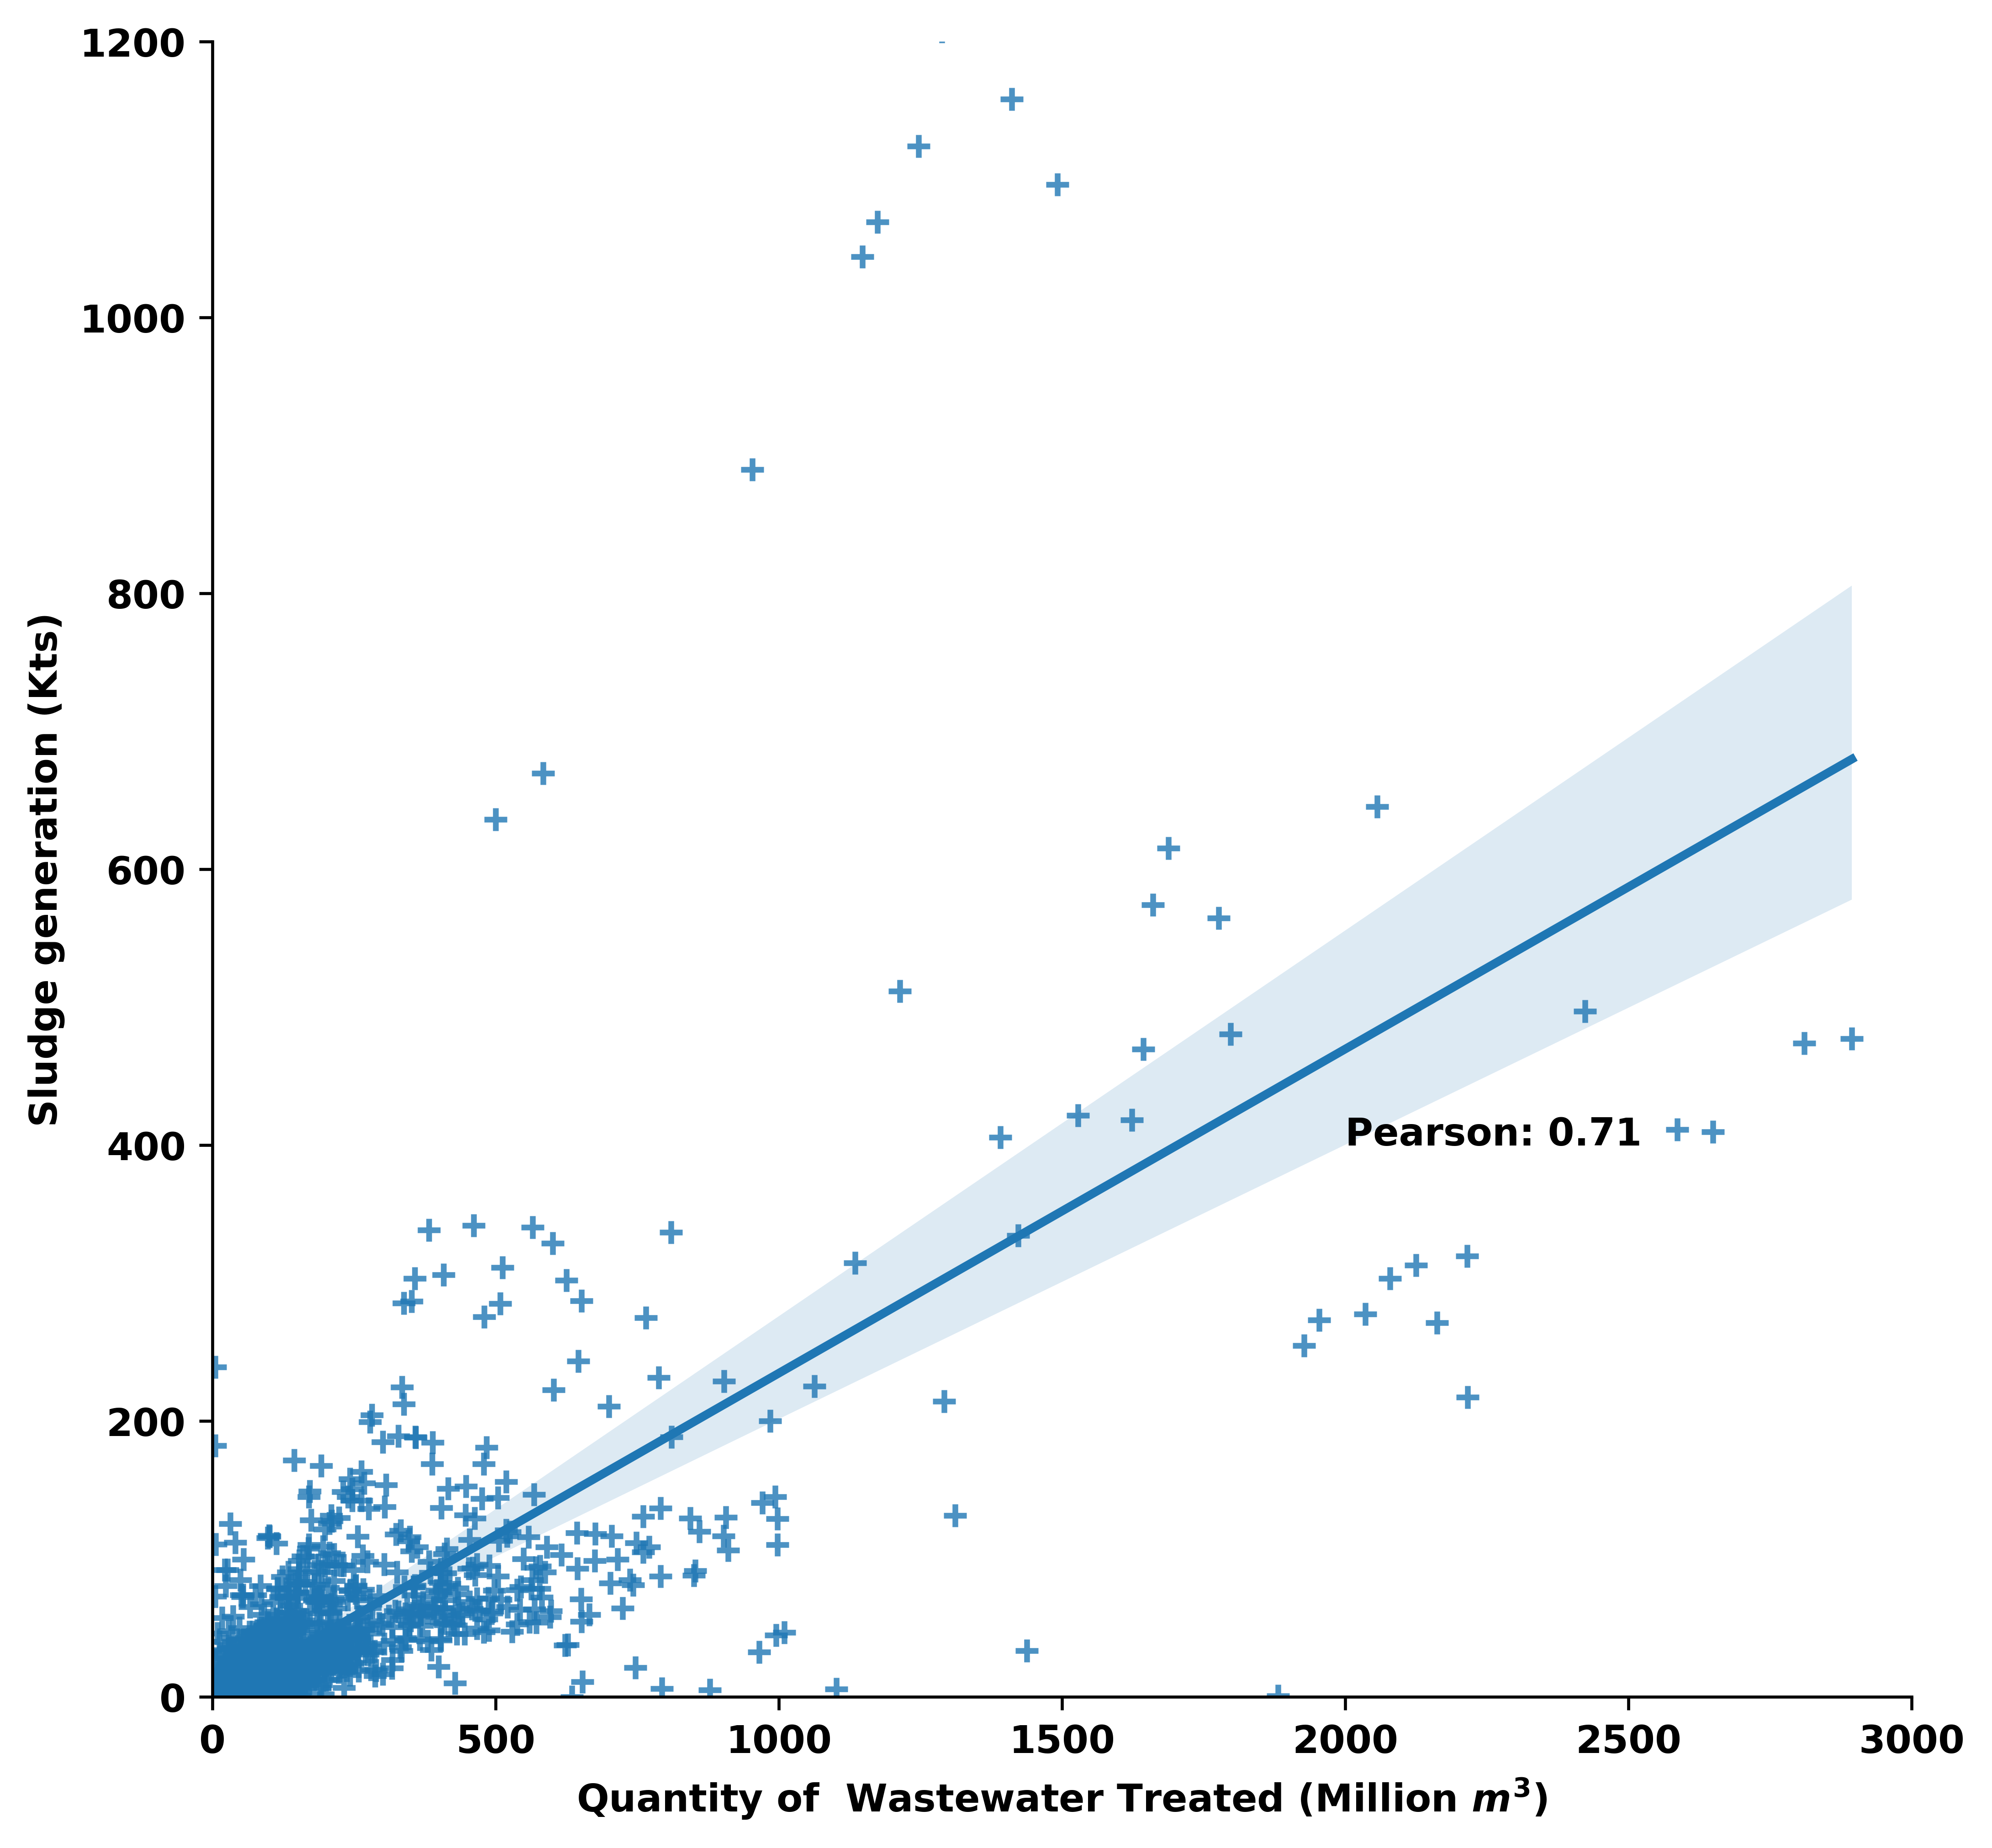

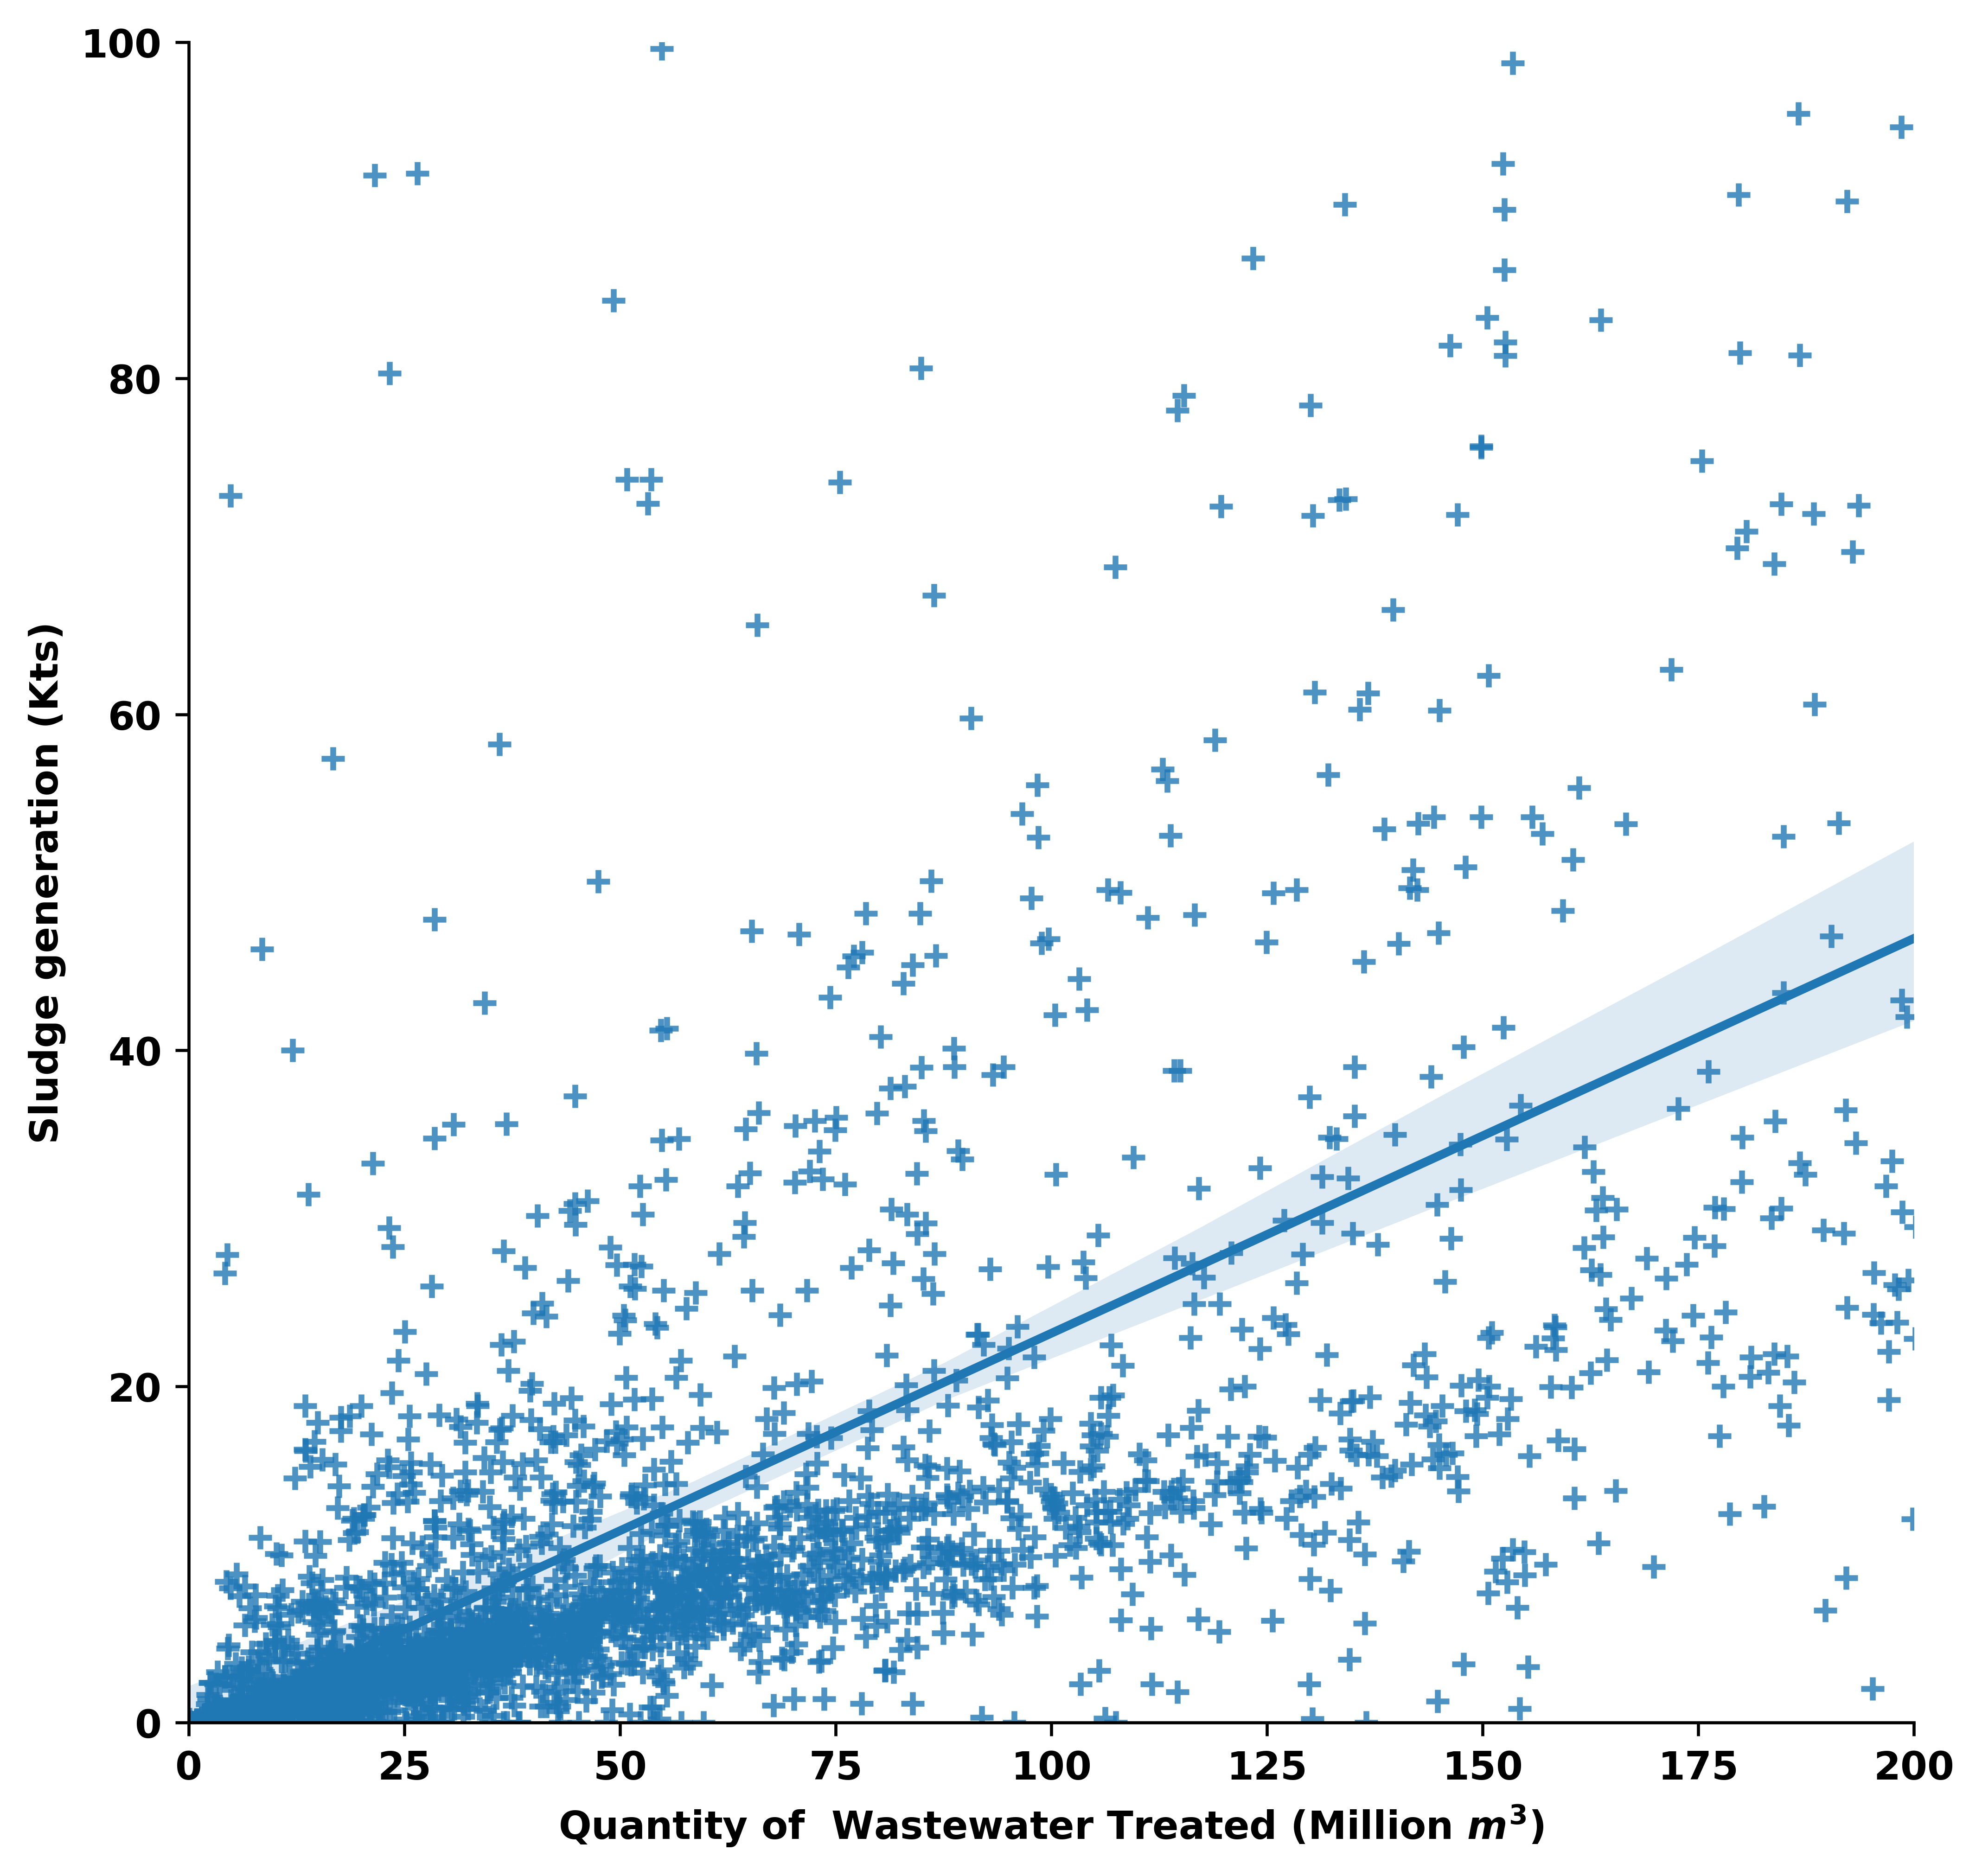

In [4]:
plt.figure(figsize=(8, 8), dpi=600)
sns.regplot(y='SLUDGE',x='WWP',data=CITY,color=None,marker='+')
plt.xlim(0,3000)
plt.ylim(0,1200)
plt.xlabel('Quantity of  Wastewater Treated (Million $m^3$)', weight='bold')
plt.ylabel('Sludge generation (Kts)', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.text(2000, 400, 'Pearson: {}'.format(corr),weight='bold')
sns.despine()
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('corr1.jpg', dpi=600, bbox_inches='tight')
plt.figure(figsize=(8, 8), dpi=600)
sns.regplot(y='SLUDGE',x='WWP',data=CITY,color=None,marker='+')
plt.xlabel('Quantity of  Wastewater Treated (Million $m^3$)', weight='bold')
plt.ylabel('Sludge generation (Kts)', weight='bold')
plt.xlim(0,200)
plt.ylim(0,100)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
sns.despine()
plt.savefig('corr2.jpg', dpi=600, bbox_inches='tight')

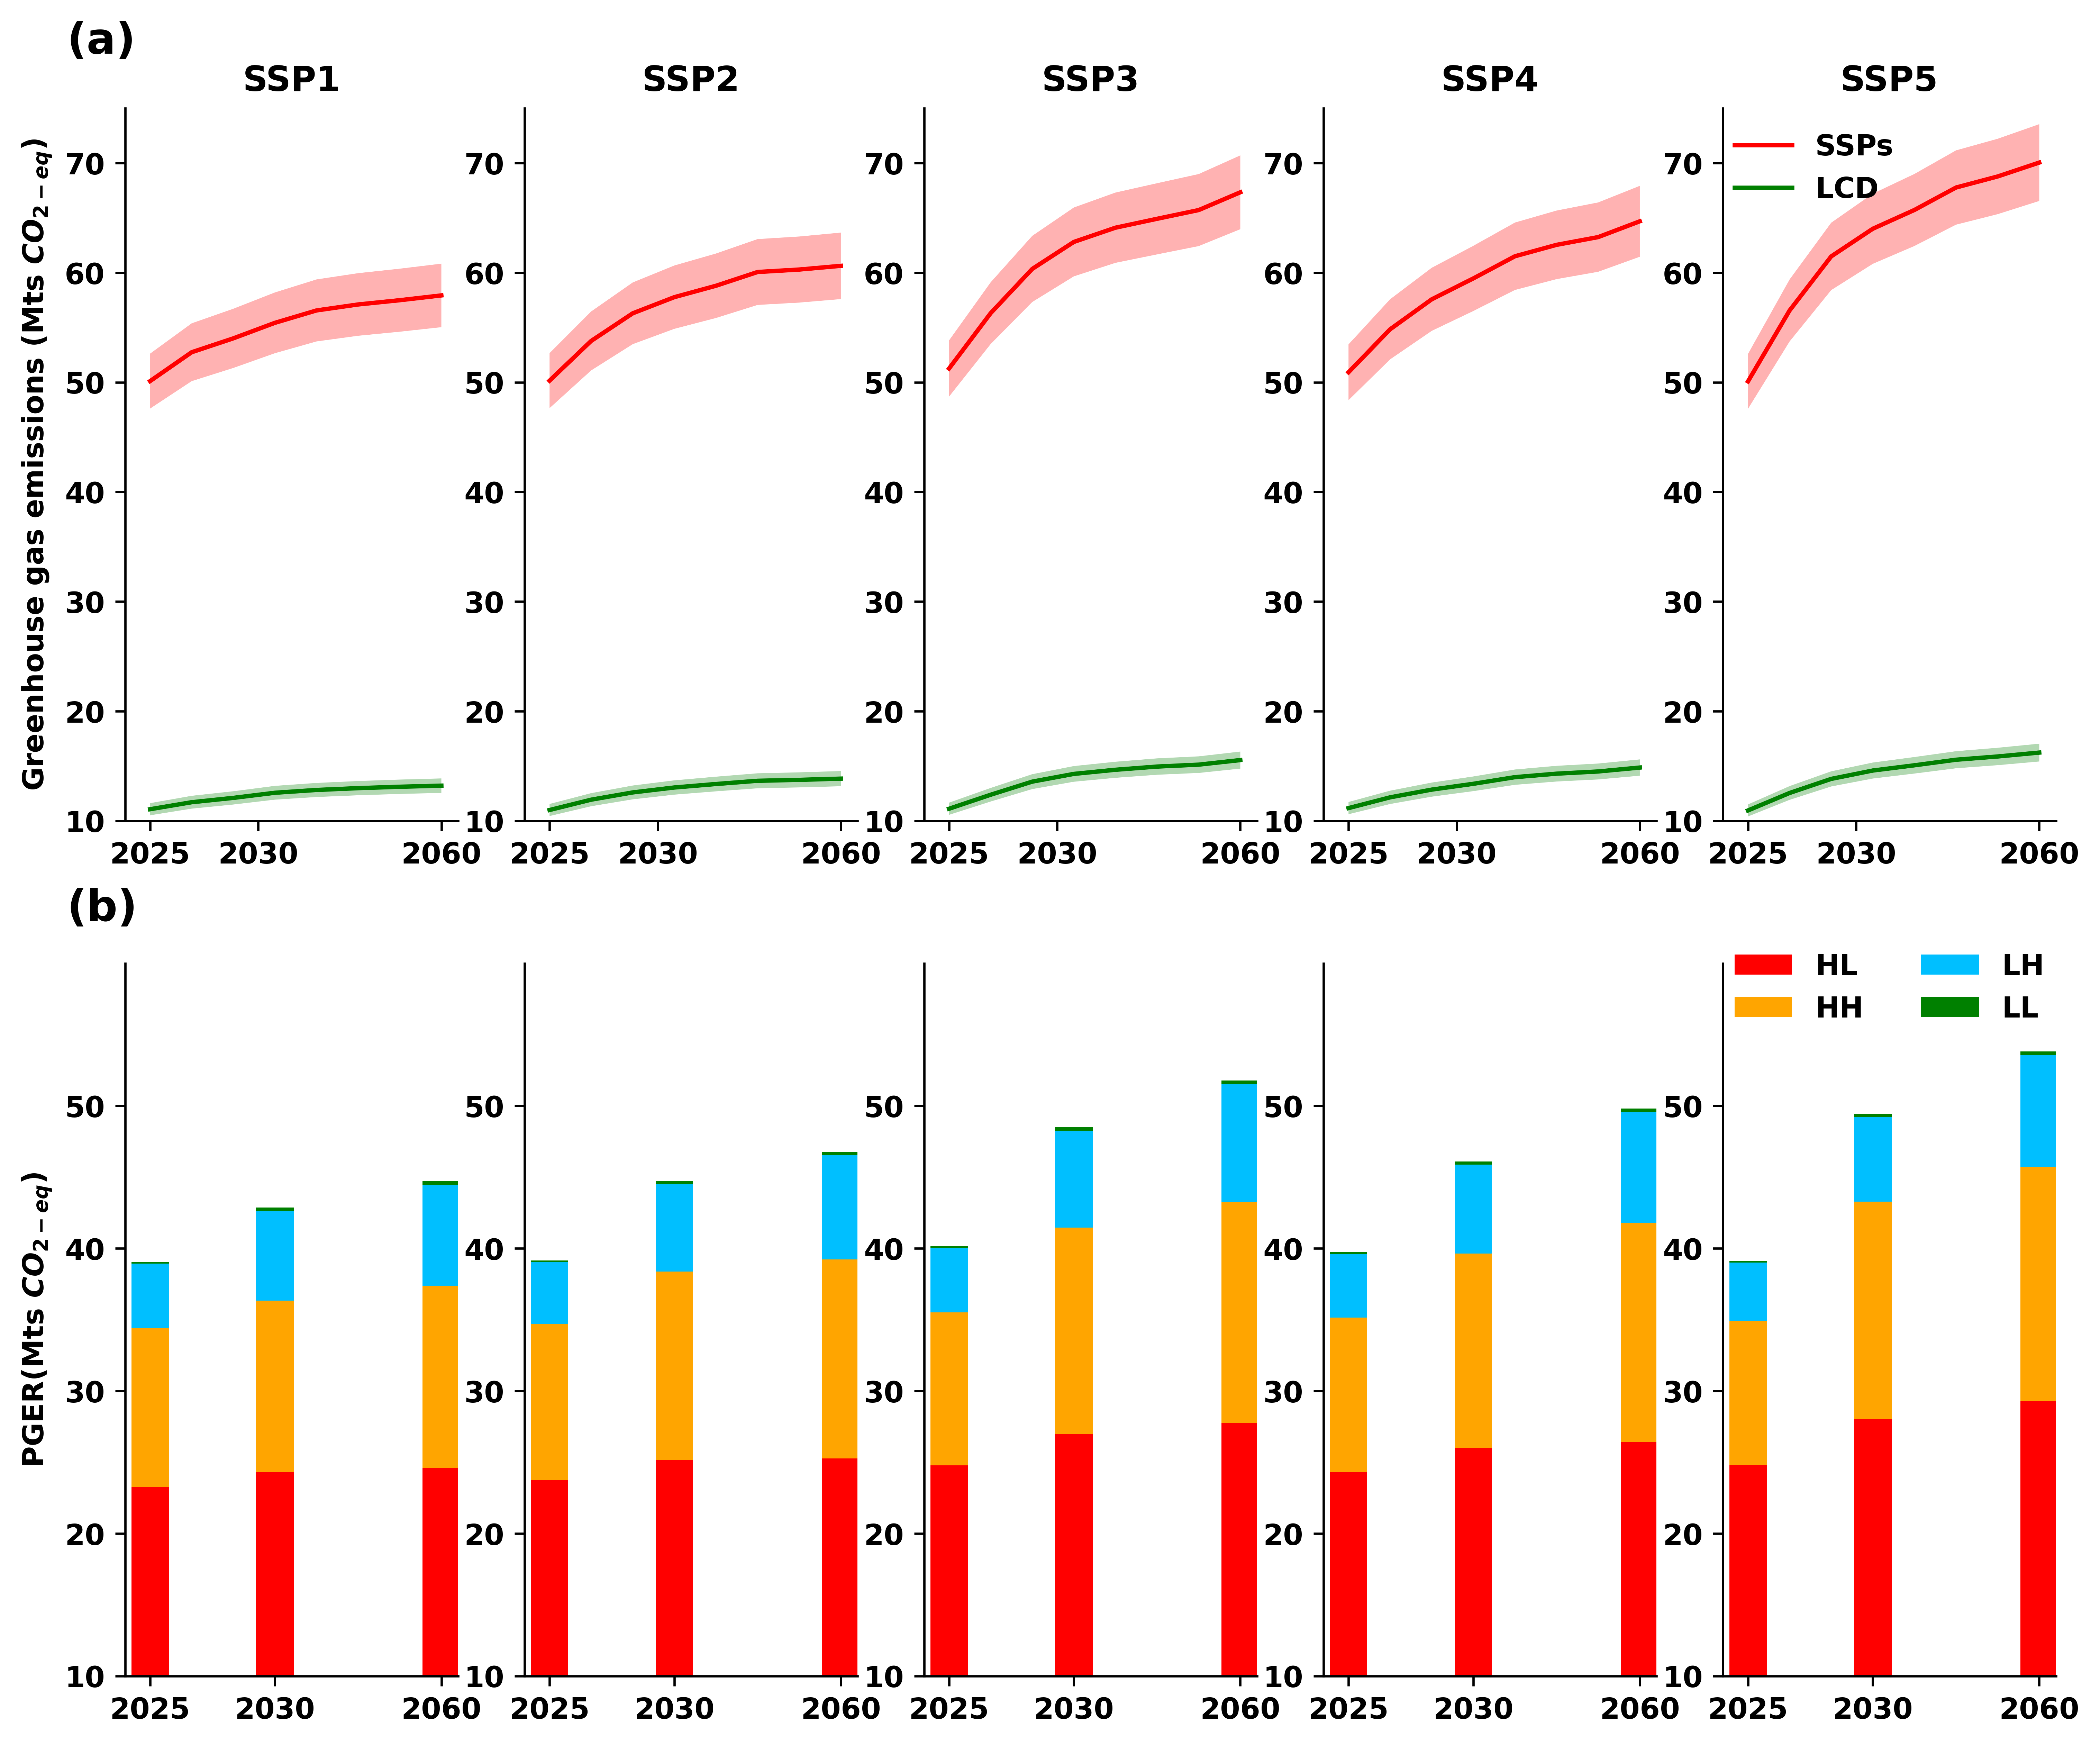

In [5]:
####


carbon = pd.read_csv('全国污泥碳排放.csv',encoding = 'utf-8')

carbon.drop(['Sum_2015_standard_future_GHG_After_AD', 'PGER_2015_standard_future', 'Sum_new_standard_future_GHG_Before_AD','PGER_new_standard_future'],
            axis=1, inplace=True)
carbon.rename(columns={'Sum_2015_standard_future_GHG_Before_AD':'Origin',
                      'Sum_new_standard_future_GHG_After_AD':'LCD'}, inplace=True)
carbon['PGER'] = carbon['Origin'] - carbon['LCD']
carbon['Origin+'] =  carbon['Origin']*1.05
carbon['Origin-'] =  carbon['Origin']*0.95

carbon['LCD+'] =  carbon['LCD']*1.05
carbon['LCD-'] =  carbon['LCD']*0.95


carbon = carbon[carbon['YEAR'].isin(list(range(2025,2065,5)))]

carbon_qg = carbon.groupby(['YEAR','SSP']).sum().reset_index()

carbon_PRO = carbon[carbon['YEAR'].isin([2025,2040,2060])]
def draw_carbon(df, ssp):
    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['Origin+'], alpha=0)
    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['Origin'], color='red', label='SSPs')
    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['Origin-'], alpha=0)
    plt.fill_between(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'],
                 carbon_qg[carbon_qg['SSP']==ssp]['Origin-'],carbon_qg[carbon_qg['SSP']==ssp]['Origin+'], 
                 facecolor='red', alpha=0.3)

    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['LCD+'], alpha=0)
    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['LCD'], color='green', label='LCD')
    plt.plot(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'], carbon_qg[carbon_qg['SSP']==ssp]['LCD-'], alpha=0)
    plt.fill_between(carbon_qg[carbon_qg['SSP']==ssp]['YEAR'],
                 carbon_qg[carbon_qg['SSP']==ssp]['LCD-'],carbon_qg[carbon_qg['SSP']==ssp]['LCD+'], 

                 facecolor='green', alpha=0.3)
    sns.despine()
    plt.ylim(10,75)
    plt.xticks((2025,2038,2060),(2025,2030,2060))
    plt.title(ssp, weight='bold')
    plt.xlim(2022,2062)
    
def draw_PGER(df, SSP):
    
    
    bar_width = 4.5
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==2)]['YEAR'], 
    height=df[(df['SSP']==SSP) & (df['cator']==2)]['PGER'],
    label='HL', 
    color='red', width=bar_width)
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==1)]['YEAR'], 
    height=df[(df['SSP']==SSP) & (df['cator']==1)]['PGER'],
    bottom=df[(df['SSP']==SSP) & (df['cator']==2)]['PGER'],
    color='orange', 
        label='HH', width=bar_width)
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==3)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==3)]['PGER'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['PGER']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['PGER']),
        color='deepskyblue', 
        label='LH', width=bar_width)
    
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==0)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==0)]['PGER'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['PGER']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['PGER']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==3)]['PGER']),
        color='g', 
        label='LL', width=bar_width)
    
    plt.ylim(10, 60)
    plt.xticks((2025,2040,2060),(2025,2030,2060), weight='bold')
    plt.yticks(np.arange(10,60,10), weight='bold')
    sns.despine()
    plt.xlim(2022,2062)
    
    
    
plt.figure(figsize=(12, 10), dpi=600)
plt.subplot(2,5,1)
draw_carbon(carbon_qg, 'SSP1')
plt.ylabel('Greenhouse gas emissions (Mts $CO_{2-eq}$)', weight='bold')
plt.text(2015,80,'(a)', fontsize=15)

plt.subplot(2,5,2)
draw_carbon(carbon_qg, 'SSP2')


plt.subplot(2,5,3)
draw_carbon(carbon_qg, 'SSP3')

plt.subplot(2,5,4)
draw_carbon(carbon_qg, 'SSP4')

plt.subplot(2,5,5)
draw_carbon(carbon_qg, 'SSP5')
plt.legend(loc=(0,0.85), frameon=False, ncol=1)

plt.subplot(2,5,6)
draw_PGER(carbon_PRO, 'SSP1')
plt.ylabel('PGER(Mts $CO_{2-eq}$)', weight='bold')
plt.text(2015,63,'(b)', fontsize=15)

plt.subplot(2,5,7)
draw_PGER(carbon_PRO, 'SSP2')

plt.subplot(2,5,8)
draw_PGER(carbon_PRO, 'SSP3')

plt.subplot(2,5,9)
draw_PGER(carbon_PRO, 'SSP4')

plt.subplot(2,5,10)
draw_PGER(carbon_PRO, 'SSP5')
plt.legend(loc=(0,0.9), frameon=False, ncol=2)
plt.rcParams.update({'font.weight':'bold'})

plt.savefig('carbon.jpg', dpi=600, bbox_inches='tight')

In [110]:
carbon.pivot_table(values='PGER', index='YEAR', columns='SSP', aggfunc=[np.sum])

sum                                            
SSP        SSP1       SSP2       SSP3       SSP4       SSP5
YEAR                                                       
2025  39.048598  39.161253  40.153300  39.750415  39.133994
2030  41.044051  41.841923  43.921677  42.690471  44.007752
2035  41.914218  43.702565  46.764473  44.719621  47.656104
2040  42.863797  44.724704  48.522095  46.097589  49.416076
2045  43.738348  45.446477  49.442929  47.511818  50.651551
2050  44.117122  46.405845  49.962470  48.234793  52.191778
2055  44.377983  46.546493  50.583954  48.740301  52.903407

In [111]:
carbon.pivot_table(values='Origin', index='YEAR', columns='SSP', aggfunc=[np.sum])

sum                                            
SSP        SSP1       SSP2       SSP3       SSP4       SSP5
YEAR                                                       
2025  50.108683  50.149873  51.256035  50.912157  50.082364
2030  52.742998  53.772491  56.302339  54.834657  56.550336
2035  54.008259  56.295052  60.341411  57.568171  61.482752
2040  55.425217  57.767551  62.804314  59.476635  64.005770
2045  56.554864  58.806257  64.101803  61.496516  65.718511
2050  57.099865  60.060036  64.913240  62.537479  67.765955
2055  57.487422  60.284441  65.709780  63.243346  68.774246